# Introduction

A Support Vector Machine is a broad term used to identify a group of algorithms who use something called "support vectors" for classification and regression. There's not much to say here in the introduction but I've had a hard time figuring out how this algorithm works so I'm going to break this down into small, easily digestible chunks so that it is easier to understand 

Let's quickly generate an example dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In /home/rupanshu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rupanshu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rupanshu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/rupanshu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rupanshu/.local/lib/python3.6/site-packages/matplotlib/

We're going to generate 100 sample datapoints with 2 features to work with

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=6)

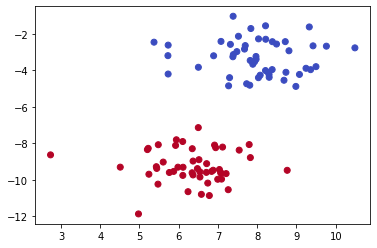

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, label=y, cmap=plt.cm.coolwarm);

As you can see, this is a simple classification problem easily separable by a linear decision boundary. Pretty easy use case to start with SVMs.

In [4]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

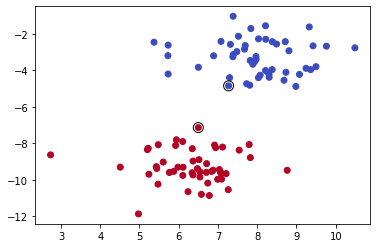

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

The circled datapoints in the above graphs are the "things" that were mentioned in the introduction, the support vectors. But what do they do really? They create the linear decision boundary.

The idea of this algorithm is simple: create a linear(or non-linear, more on this later) separating boundary using the most "outward" looking datapoints and call them Support Vectors

Lets plot the decision boundary for better understanding

In [6]:
# create a mesh to plot in
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

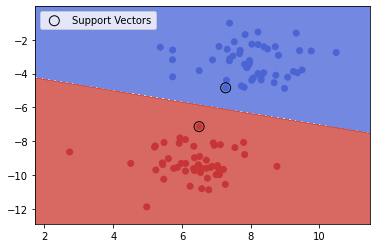

In [7]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
c = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend(loc='upper left');

The Euclidean distance between both the support vectors and the decision boundary is the same and is called the "margin". This margin should be exactly half the distance between the two support vectors.

If we add some constant value to the decision boundary, say 1 is added to the decision boundary without changing the slope, there will be an imbalance: it will be closer to the blue datapoints and away from the red ones. Since this doesn't happen and what we get is the maximum possible distance from the support vectors, this is called a "Maximal Margin Classifier"

This is cool until there are outliers. I'll show you with an example. I'll add a "red" datapoint to our training set to see how the model reacts to it

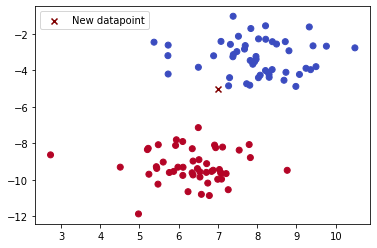

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(7, -5, marker='x', color='maroon', label='New datapoint')
plt.legend(loc='upper left');

In [9]:
X = np.append(X, [7, -5]).reshape(-1, 2)
y = np.append(y, [1])

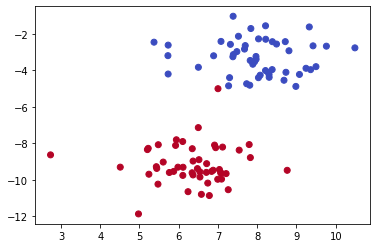

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

The new point, obviously doesn't belong where it is, but SVM doesn't know that. Lets build the model again using the new data

In [11]:
clf = SVC(kernel='linear', C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

The `C=1000` parameter tells the model not to apply regularization.

Big C -> Less regularization<br>
Small C -> More regularization

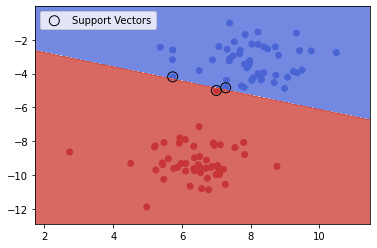

In [12]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
c = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend(loc='upper left');

The Support Vectors changed and the decision boundary too! This tells us that Maximum Margin Classifier in itself(if not regularized) can make decision boundary that doesn't make sense.

To keep this from happening we must allow misclassifications(smaller C) so that the red point is classified as blue but the decision boundary is correct as follows:

In [13]:
clf = SVC(kernel='linear', C=0.05)
clf.fit(X, y)

SVC(C=0.05, kernel='linear')

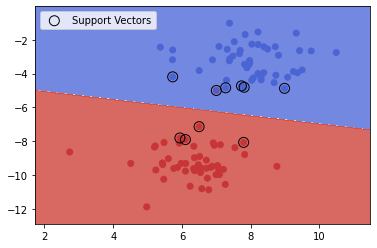

In [14]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
c = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend(loc='upper left');

Phew, the classification boundary looks right. Now, the distance between the Support Vectors and the decision boundary is called **"soft margin"**. And this method is called a "Soft Margin Classifier" or "Support Vector Machine"

The Support Vector Classifier, in case of 2 features, generated a line. Had we applied it on a 1 feature dataset, it'd have generated a point.

1 feature  -> decision boundary is just a point<br>
2 features -> decision boundary is a 1 dimensional line<br>
3 features -> 2 dimensional plane<br>
4 features -> 3 dimensional hyperplane<br>
.<br>
.<br>
.<br>
n features -> n-1 dimensional hyperplane<br>

**Note**: All separating decision boundaries irrespective of their dimension in Support Vector Classifiers can be called "hyperplanes". So a line is also a hyperplane.

Cool. Our work is done here, right? Wrong. This was a nice test case where the cases were linearly separable. What if they aren't, like in real world datasets, linearly separable?

In [15]:
np.random.seed(21)

In [16]:
X = (np.linspace(0, 10, 7)         - abs(np.random.randn(7))).tolist()\
        + np.linspace(10, 20, 20).tolist()\
        + (np.linspace(20, 30,  8) - abs(np.random.randn(8))).tolist()
X = np.array(X)
y = ((X > 10) & (X < 20)).astype('int')

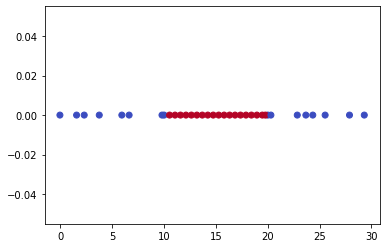

In [17]:
plt.scatter(X, np.zeros(len(X)), c=y, cmap=plt.cm.coolwarm)

We cannot separate this using a linear boundary. What do we do now? We take it to a higher dimension! Lets square these values to know what I mean

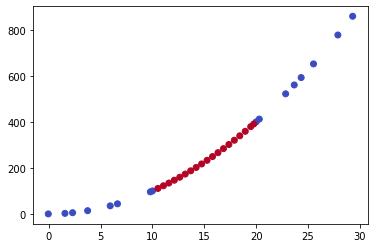

In [18]:
plt.scatter(X, X**2, c=y, cmap=plt.cm.coolwarm)

Lets apply an unregularized Support Vector Classifier to this dataset

In [19]:
X = np.c_[X, X**2]

In [20]:
clf = SVC(kernel='linear', C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

In [21]:
# create a mesh to plot in
h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

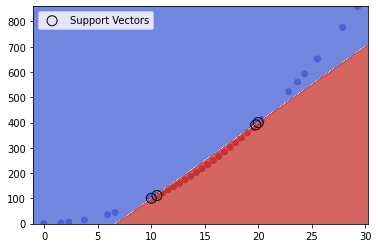

In [22]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
c = plt.contourf(xx, yy, Z + 1, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend(loc='upper left');

The points are now linearly separable using the decision boundary shown above.

That was a nice trick we used, wasn't it? This method of converting your data to a higher dimensional data is called the **Kernel trick**. It is called a "trick" because the data is not actually transformed to a higher dimension, calculations are done in place. But why did we square it? We could've cubed it, or square-root'ed it(if that's a word). To address this, they have come up with various "kernels" which have their own rules to transform lower dimensional data. In our case, a Polynomial kernel with degree = 2 was used.

There are several kernels officially supported by Scikit-Learn. These are:

- Linear
- Polynomial
- RBF (Radial Basis Function)
- Sigmoid
- Precomputed

# References:

- Awesome tutorial by StatQuest: https://www.youtube.com/watch?v=efR1C6CvhmE
- https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
- https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html